# Understanding the whole data structure and experimenting 

In [ ]:
import pathlib
import numpy as np
from scipy.io import loadmat
import scipy.io


In [ ]:
data_dir = 'datasets\ML_brainData'
desktop = pathlib.Path(data_dir)

In [ ]:
dataset = []
for i in list(desktop.iterdir()):
    dataset.append(loadmat(i))

In [ ]:
mat_data = dataset[0]

In data you will find three variables defined: info, data, and
meta
- The variable 'meta' contains general information about the dataset.  
- The variable 'info' describes information about each presentation trial.  
- The variable 'data' contains the actual image intensity data values.

### Understanding the META data

meta: This variable provides information about the data set. Relevant fields are
shown in the following example:

meta =

         study: 'science'
       subject: 'P1'
       ntrials: 360
       nvoxels: 21764
          dimx: 51
          dimy: 61
          dimz: 23
    colToCoord: [21764x3 double]
    coordToCol: [51x61x23 double]

meta.study gives the name of the fMRI study.

meta.subject gives the identifier for the human subject.

meta.ntrials gives the number of trials in this dataset.

meta.nvoxels gives the number of voxels (3D pixels) in each image.

meta.dimx gives the maximum x coordinate in the brain image.  The minimum x
coordinate is x=1.  meta.dimy and meta.dimz give the same information for the y
and z coordinates.

meta.colToCoord(v,:) gives the geometric coordinate (x,y,z) of the voxel
corresponding to column v in the data.

meta.coordToCol(x,y,z) gives the column index (within the data) of the voxel
whose coordinate is (x,y,z).

In [ ]:
mat_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Oct 20 19:12:48 2009',
 '__version__': '1.0',
 '__globals__': [],
 'meta': array([[(array(['science'], dtype='<U7'), array(['P1'], dtype='<U2'), array([[360]], dtype=uint16), array([[21764]], dtype=uint16), array([[51]], dtype=uint8), array([[61]], dtype=uint8), array([[23]], dtype=uint8), array([[31, 10,  1],
                [32, 10,  1],
                [33, 10,  1],
                ...,
                [22, 35, 22],
                [23, 35, 22],
                [24, 35, 22]], dtype=uint8), array([[[0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 ...,
                 [0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0]],
 
                [[0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 ...,
             

In [ ]:
study = mat_data["meta"][0][0]["study"][0]
print("The study area is:",study)

The study area is: science


In [ ]:
subject = mat_data["meta"][0][0]["subject"][0]
print("The subject on whom study is done is:",subject)

The subject on whom study is done is: P1


In [ ]:
ntrials = mat_data["meta"][0][0]["ntrials"][0][0]
print("The number of trails are:",ntrials)

The number of trails are: 360


In the context of fMRI data, a voxel is a three-dimensional unit of the brain image. Each voxel represents a cube of brain tissue and contains a signal value that reflects the level of brain activity in that region.

In [ ]:
nvoxels = mat_data["meta"][0][0]["nvoxels"][0][0]
print("The number of voxels are:",nvoxels)

The number of voxels are: 21764


In [ ]:

dimx = mat_data["meta"][0][0]["dimx"][0][0]
rangeX = (1 , dimx)
print("The range of x dimension is:",rangeX)

The range of x dimension is: (1, 51)


In [ ]:
dimy = mat_data["meta"][0][0]["dimy"][0][0]
rangeY = (1 , dimy)
print("The range of y dimension is:",rangeY)

The range of y dimension is: (1, 61)


In [ ]:
dimz = mat_data["meta"][0][0]["dimz"][0][0]
rangeZ = (1 , dimz)
print("The range of x dimension is:",rangeZ)

The range of x dimension is: (1, 23)


colToCoord: This is a mapping from column indices to 3D coordinates. If you have a column index v and you want to know where this voxel is located in the 3D brain image, you would use this mapping.

It's a 2D array v * [x , y ,z]

In [ ]:
coordinates = mat_data["meta"][0][0]["colToCoord"]
print("The total coordinates are:",len(coordinates))
print(coordinates)

The total coordinates are: 21764
[[31 10  1]
 [32 10  1]
 [33 10  1]
 ...
 [22 35 22]
 [23 35 22]
 [24 35 22]]


coordToCol: It contains the whole 3D coordinates and each point (x,y,z) gives the column number to which this voxel corresponds to in the data

In [ ]:
print(mat_data["meta"][0][0]["coordToCol"].shape)

(51, 61, 23)


In [ ]:
print(mat_data["meta"])

[[(array(['science'], dtype='<U7'), array(['P1'], dtype='<U2'), array([[360]], dtype=uint16), array([[21764]], dtype=uint16), array([[51]], dtype=uint8), array([[61]], dtype=uint8), array([[23]], dtype=uint8), array([[31, 10,  1],
         [32, 10,  1],
         [33, 10,  1],
         ...,
         [22, 35, 22],
         [23, 35, 22],
         [24, 35, 22]], dtype=uint8), array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],

         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],

         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0

### Understanding the INFO data
info: This variable defines the experiment in terms of a sequence of 'trials'.
'info' is a 1x360 struct array, describing the 360 trials.  The relevant fields
of info are illustrated in the following example:

info(50) =

           cond: 'tool'
    cond_number: 11
           word: 'hammer'
    word_number: 2
          epoch: 1

info.cond gives the condition (in most cases, category of the word) presented
during this trial.

info.cond_number gives the numeric index of the condition presented during this
trial.  info.cond_number ranges from 2 to 13 because there are twelve different
categories.  Notice that the indexing started at 2 because cond_number=1 was
used to indicate a rest, or fixation interval.  In the provided example, the
cond is 11 because 'tool' is the tenth category.

info.word gives the word presented during this trial.  For instance, the word
'hammer' is presented during this trial.

info.word_number gives the numeric index of the word presented during this
trial.  info.word_number ranges from 1 to 5 because there are five words per
condition.  For instance, the word_number=2 here because 'hammer' is the second
word in the 'tool' category.

info.epoch gives the number of times this word has been presented.  For
instance, epoch=1 denotes this is the first time the word 'hammer' is
presented.

In [ ]:
print(len(mat_data["info"][0]))
print("There are ntrials number of arrays in the info where each array corresponds to the each trial")

360
There are ntrials number of arrays in the info where each array corresponds to the each trial


In [ ]:
print("In total there are 12 conditions and 5 words in each conditions which make 60 wordss in total")

In total there are 12 conditions and 5 words in each conditions which make 60 wordss in total


In [ ]:
# print(mat_data["info"][0]["cond"])
unique_conditions = np.unique(mat_data["info"][0]["cond"] , return_index = True)
print("The unique conditions in the data :",unique_conditions[0])
print("The unique conditions values in the data :",np.unique(mat_data["info"][0]["cond_number"]))
conditions_dict = {}
for i in unique_conditions[1]:
  conditions_dict[mat_data["info"][0]["cond_number"][i][0][0]] = mat_data["info"][0]["cond"][i][0]
print()
print("The unique conditions and it's corresponding cond_number are: ")
for i in conditions_dict: print(i , conditions_dict[i])

The unique conditions in the data : [array(['animal'], dtype='<U6') array(['bodypart'], dtype='<U8')
 array(['building'], dtype='<U8') array(['buildpart'], dtype='<U9')
 array(['clothing'], dtype='<U8') array(['furniture'], dtype='<U9')
 array(['insect'], dtype='<U6') array(['kitchen'], dtype='<U7')
 array(['manmade'], dtype='<U7') array(['tool'], dtype='<U4')
 array(['vegetable'], dtype='<U9') array(['vehicle'], dtype='<U7')]
The unique conditions values in the data : [array([[2]], dtype=uint8) array([[3]], dtype=uint8)
 array([[4]], dtype=uint8) array([[5]], dtype=uint8)
 array([[6]], dtype=uint8) array([[7]], dtype=uint8)
 array([[8]], dtype=uint8) array([[9]], dtype=uint8)
 array([[10]], dtype=uint8) array([[11]], dtype=uint8)
 array([[12]], dtype=uint8) array([[13]], dtype=uint8)]

The unique conditions and it's corresponding cond_number are: 
2 animal
3 bodypart
4 building
5 buildpart
6 clothing
7 furniture
8 insect
9 kitchen
10 manmade
11 tool
12 vegetable
13 vehicle


In [ ]:
# unique_data = np.unique(mat_data["info"][0]["word"] , return_index = True)
# print(unique_data)
# data_dict = {}
# print(len(unique_data[1]))
# for i in unique_data[1]:
#   print(mat_data["info"][0]["word_number"][i])
#   print(mat_data["info"][0]["word"][i])
#   data_dict[mat_data["info"][0]["word_number"][i][0][0]] = mat_data["info"][0]["word"][i][0]
# print("The unique conditions and it's corresponding cond_number are: ")
# for i in data_dict: print(i , data_dict[i])
print("There are 5 word_numbers in each condition number so instead of making a seperate dictionary , we can use the same info np array for better computation")

There are 5 word_numbers in each condition number so instead of making a seperate dictionary , we can use the same info np array for better computation


In [ ]:
print(mat_data["info"])

[[(array(['manmade'], dtype='<U7'), array([[10]], dtype=uint8), array(['refrigerator'], dtype='<U12'), array([[3]], dtype=uint8), array([[1]], dtype=uint8))
  (array(['building'], dtype='<U8'), array([[4]], dtype=uint8), array(['barn'], dtype='<U4'), array([[2]], dtype=uint8), array([[1]], dtype=uint8))
  (array(['manmade'], dtype='<U7'), array([[10]], dtype=uint8), array(['bell'], dtype='<U4'), array([[1]], dtype=uint8), array([[1]], dtype=uint8))
  (array(['manmade'], dtype='<U7'), array([[10]], dtype=uint8), array(['key'], dtype='<U3'), array([[2]], dtype=uint8), array([[1]], dtype=uint8))
  (array(['buildpart'], dtype='<U9'), array([[5]], dtype=uint8), array(['window'], dtype='<U6'), array([[5]], dtype=uint8), array([[1]], dtype=uint8))
  (array(['tool'], dtype='<U4'), array([[11]], dtype=uint8), array(['screwdriver'], dtype='<U11'), array([[5]], dtype=uint8), array([[1]], dtype=uint8))
  (array(['building'], dtype='<U8'), array([[4]], dtype=uint8), array(['church'], dtype='<U6'), 

### Understanding the DATA data
data: This variable contains the raw observed data.  The fMRI data is a
sequence of images collected over time.  The data structure 'data' is a [360x1]
cell array, with one cell per 'trial' in the experiment.  Each element in this
cell array is an 1xV array of observed fMRI activations.  The element
data{x}(1,v) gives the fMRI observation at voxel v within trial x.  The full
image at time t within trial x is given by data{x}(1,:).

In [ ]:
print(len(mat_data["data"][0][0][0]))

21764


In [ ]:
print(mat_data["data"])

[[array([[-0.0268068 ,  0.68483384,  0.9132587 , ..., -0.67066825,
          -1.45709228, -0.85008493]])                             ]
 [array([[ 0.91838692,  1.04450499,  0.77500801, ..., -1.82493971,
          -1.49682133, -1.52025864]])                             ]
 [array([[ 0.40446271,  0.49151523,  0.32273739, ..., -0.03602276,
           0.67378845, -0.55942959]])                             ]
 [array([[0.15414283, 0.09053374, 0.12606509, ..., 0.37650717, 0.3692738 ,
          1.37987106]])                                                   ]
 [array([[0.02265704, 0.06658259, 0.06256529, ..., 0.80296236, 0.53636439,
          0.77228023]])                                                   ]
 [array([[-0.65821473, -0.34457243, -0.5331733 , ...,  0.08847253,
           0.37689279, -0.47007973]])                             ]
 [array([[ 0.0220066 , -0.03641728, -0.27589982, ..., -0.46916651,
          -0.78068511, -1.52862826]])                             ]
 [array([[0.56486113, 0

### Total Data Understanding

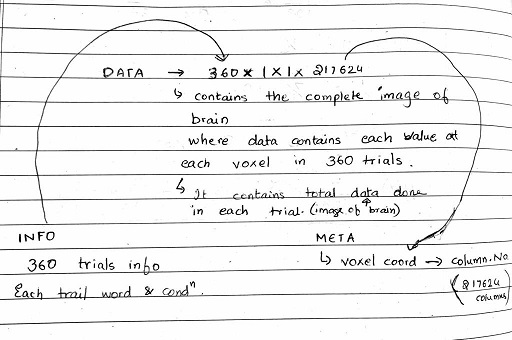